In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import bz2

### Ejercicio 1
#### Count the number of lines in Python for each file

In [3]:
!ls -l

total 1015628
-rw-rw-rw- 1 angelrps angelrps    523313 Jan  8 16:31  01_intro_to_DS_toolkit_inclass.ipynb
-rw-rw-rw- 1 angelrps angelrps     50785 Jan  8 12:52  02-loading_and_saving_data_inclass.ipynb
-rwxrwxrwx 1 angelrps angelrps    173167 Jan  8 10:13  10-11_Python_AmadChall_v19.pptx
-rw-rw-rw- 1 angelrps angelrps    189652 Jan 11 13:59  Amadeus_Challenge_Class.ipynb
-rw-rw-rw- 1 angelrps angelrps     11809 Jan 15 10:46  Amadeus_Challenge_Test.ipynb
-rw-rw-rw- 1 angelrps angelrps 554970628 Jan  9 09:44  bookings.csv.bz2
-rw-rw-rw- 1 angelrps angelrps    535893 Jan 11 09:21  bookings.sample.csv.bz2
-rw-rw-rw- 1 angelrps angelrps     14965 Jan 14 09:21  ch_01-Empty.ipynb
-rw-rw-rw- 1 angelrps angelrps    201405 Jan 14 09:21  ch_02-Empty.ipynb
-rw-rw-rw- 1 angelrps angelrps     40244 Jan 14 09:21  ch_05-empty.ipynb
-rw-rw-rw- 1 angelrps angelrps 483188920 Jan  9 09:44  searches.csv.bz2
-rw-rw-rw- 1 angelrps angelrps     77878 Jan 11 13:33  top_airports.csv
-rwxrwxrwx 1 angelrps angelr

In [4]:
%time
!bzcat bookings.csv.bz2 | wc -l
#result was 100000 11
#time processing 1' 28''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 25 µs
10000011


In [5]:
%time
!bzcat searches.csv.bz2 | wc -l
#result was 20390198
#time processing 1' 30''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 25.7 µs
20390198


In [2]:
%time
bookingsfile = bz2.open("./bookings.csv.bz2")
dfbookings = pd.read_csv(bookingsfile, sep='^')
len(dfbookings.index)
#time processing 2' 58''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs


NameError: name 'bz2' is not defined

In [7]:
%time
searchesfile = bz2.open("./searches.csv.bz2")
dfsearches = pd.read_csv(searchesfile, sep='^')
len(dfsearches.index)
#time processing 6' 54''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


20390198

### Ejercicio 2
#### Top 10 arrival airports in the world in 2013 (using the bookings file)

- Arrival airport is the column arr_port. It is the IATA code for the airport.
- To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
- Print the top 10 arrival airports in the standard output, including the number of passengers.

- Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)
- Bonus point: Solve this problem using pandas (instead of any other approach)

In [8]:
#Get 2 columns of interest
dfbookreduced = dfbookings[['arr_port','pax']]
#Group data by arr_port
grouped_bookings = dfbookreduced.groupby('arr_port')
#Sum pax, sort and show the first ten
grouped_bookings.sum().sort_values(by='pax', ascending=False).head(10)

pax
arr_port         
LHR       88809.0
MCO       70930.0
LAX       70530.0
LAS       69630.0
JFK       66270.0
CDG       64490.0
BKK       59460.0
MIA       58150.0
SFO       58000.0
DXB       55590.0

### Ejercicio 3
#### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 
Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

Bonus point: Solving this problem using pandas (instead of any other approach)


In [9]:
#Take the 2 columns of interest
dfs = dfsearches[['Date','Destination']]
#remove 'day' from Date so it can be sorted by month
dfs["Date"] = dfs['Date'].str[:-3]

/home/angelrps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
#Retrieve Malaga values
#Retrieve Madrid values
#Retrieve Barcelona values
dfsAGP = dfs.loc[dfs['Destination'] == 'AGP']
dfsMAD = dfs.loc[dfs['Destination'] == 'MAD']
dfsBCN = dfs.loc[dfs['Destination'] == 'BCN']

# .value_counts() returns number of unique values for a particular column
dfsAGPcount = dfsAGP['Date'].value_counts()
dfsMADcount = dfsMAD['Date'].value_counts()
dfsBCNcount = dfsBCN['Date'].value_counts()

In [11]:
#Create cleaned and sorted Malaga data frame
MADdata = pd.DataFrame({'DateCount' : dfsMADcount, 'Destination' : 'MAD'})
MADdata.sort_index(inplace=True)
#Create cleaned and sorted Madrid data frame
AGPdata = pd.DataFrame({'DateCount' : dfsAGPcount, 'Destination' : 'AGP'})
AGPdata.sort_index(inplace=True)
#Create cleaned and sorted Barcelona data frame
BCNdata = pd.DataFrame({'DateCount' : dfsBCNcount, 'Destination' : 'BCN'})
BCNdata.sort_index(inplace=True)

#Create final data frame from other 3 data frames
FINALdata = pd.concat([AGPdata['DateCount'], MADdata['DateCount'], BCNdata['DateCount']], axis=1, keys=['AGP', 'MAD', 'BCN'])
FINALdata

AGP    MAD    BCN
2013-01   9633  24258  29469
2013-02   8379  22800  28329
2013-03  10659  24681  30552
2013-04   8265  25251  31236
2013-05  10830  26334  28728
2013-06   7923  22800  26505
2013-07   8892  22971  29241
2013-08   7866  21831  27075
2013-09   8151  21147  23427
2013-10   6499  22294  20276
2013-11   6384  20272  19824
2013-12   3696  14504  15400

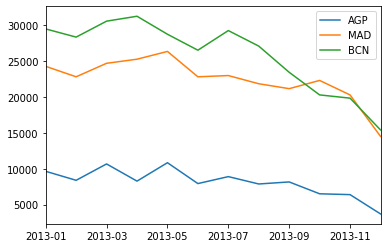

In [12]:
#Plot final data
FINALdata.plot()

### Ejercicio 4
#### Match searches with bookings

- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. 
- For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 
- Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

I assume that searches ending in booking where done the same day. Thus I will find searches which Data, Origin and Destination match with booking Date, Origin and Destination

In [77]:
import pandas as pd
import bz2
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
dfbookings.sample(5)

act_date             source  pos_ctry  \
9685369  2013-06-05 00:00:00  1S      US         
7601688  2013-01-03 00:00:00  1A      GB         
9089871  2013-03-13 00:00:00  1A      ES         
9487981  2013-05-06 00:00:00  1S      CO         
5694993  2013-10-08 00:00:00  1G      AT         

                                 pos_iata                         pos_oid    \
9685369  fdf37bc10727f089c914a5f69dd57fde  5163e9b2a99cf3076eb7c58e6683633b   
7601688  b2b43e3a5477484b5fbf361b52182a17  d1b80a3dca253a3816073469f2cfe6be   
9089871  f7a5097c4d76e3f1109b22fd5e82af64  e405c0b688a81e623bf35c85e8ade5cf   
9487981  c47d08e0aae7a7c000103ab56070d62a  02706affbb2a447f92bcf978b133a6ba   
5694993  0c07eb4710fa2fce153385b54cd02541  50570cce0154556af00b60c51dd64bde   

                           rloc            cre_date            duration  \
9685369  1a8783a41a89821da8fb85be1de16ed5  2013-06-05 00:00:00     4121   
7601688  cbb9cb94c81892e9fc7a01cf53bc9f28  2013-01-03 00:00:00    48494   
9089871  92a12b1c753372d56a9853bb08dbc995  2013-02-22 00:00:00      577   
9487981  14ed7d8f56d4e7bb1eff39f7f3831934  2013-05-06 00:00:00    27326   
5694993  03abb26692d28f648e109a9d1d378859  2013-10-07 00:00:00     3251   

        distance  dep_port  dep_city  dep_ctry  arr_port  arr_city  arr_ctry  \
9685369        0  BOS       BOS       US        DUB       DUB       IE         
7601688        0  DOH       DOH       QA        LAS       LAS       US         
9089871        0  PMI       PMI       ES        IBZ       IBZ       ES         
9487981        0  CUC       CUC       CO        CLO       CLO       CO         
5694993        0  VIE       VIE       AT        FRA       FRA       DE         

         lst_port  lst_city  lst_ctry  brd_port  brd_city  brd_ctry  off_port  \
9685369  BOS       BOS       US        DUB       DUB       IE        BOS        
7601688  DOH       DOH       QA        MAN       MAN       GB        LAS        
9089871  PMI       PMI       ES        IBZ       IBZ       ES        PMI        
9487981  CUC       CUC       CO        CLO       CLO       CO        CUC        
5694993  VIE       VIE       AT        VIE       VIE       AT        FRA        

         off_city  off_ctry  mkt_port  mkt_city  mkt_ctry intl  \
9685369  BOS       US        BOSDUB    BOSDUB    IEUS        1   
7601688  LAS       US        LASMAN    LASMAN    GBUS        1   
9089871  PMI       ES        IBZPMI    IBZPMI    ESES        0   
9487981  CUC       CO        CLOCUC    CLOCUC    COCO        0   
5694993  FRA       DE        FRAVIE    FRAVIE    ATDE        1   

         route           carrier  bkg_class  cab_class  brd_time             \
9685369     DUBBOS            OS  D          C          2013-08-02 16:15:00   
7601688  MANLAS               GD  N          Y          2013-06-02 12:35:00   
9089871     IBZPMI            SL  B          Y          2013-03-20 17:20:00   
9487981  CLOBOGCUC            VK  O          Y          2013-06-05 09:05:00   
5694993  VIEFRA               YD  V          Y          2013-10-22 10:50:00   

         off_time             pax    year  month  oid        
9685369  2013-08-02 17:41:48  1.0  2013.0    6.0  NULL       
7601688  2013-06-02 14:59:05  1.0  2013.0    1.0  LONOP38AW  
9089871  2013-03-20 18:17:49  1.0  2013.0    3.0  MADEL2239  
9487981  2013-06-05 12:26:20  1.0  2013.0    5.0  NULL       
5694993  2013-10-22 12:21:50  1.0  2013.0   10.0  NULL

In [15]:
dfsearches.sample(5)

Date      Time TxnCode                          OfficeID  \
14571296  2013-07-31  20:49:02     MPT  ad5e8547187c6456a514c30f9bfc09ef   
11348752  2013-08-08  03:30:26     MPT  54f6f48446ebb52e3d8a1936d8dbf8bc   
7530309   2013-12-17  12:17:07     MPT  367937ca733d0d562ca6b751274304c8   
5695075   2013-11-06  09:13:10     MPT  9680a1906bab38d04b27e0028d116325   
4419335   2013-04-22  07:26:38     MPT  d9de8ae598557f9f3e3de9697e27e7aa   

         Country Origin Destination  RoundTrip  NbSegments Seg1Departure  \
14571296      US    NYC         TLV        1.0         2.0           NYC   
11348752      UA    YTM         YTO        0.0         1.0           YTM   
7530309       GB    LON         NYC        0.0         1.0           LON   
5695075       DE    MEL         MUC        1.0         2.0           MEL   
4419335       CH    BSL         NCE        1.0         2.0           BSL   

         Seg1Arrival    Seg1Date Seg1Carrier Seg1BookingCode Seg2Departure  \
14571296         TLV  2013-12-18          WD             NaN           TLV   
11348752         YTO  2014-05-10         NaN             NaN           NaN   
7530309          NYC  2013-12-25         NaN             NaN           NaN   
5695075          MUC  2013-12-16         NaN             NaN           MUC   
4419335          NCE  2013-06-28          XR             NaN           NCE   

         Seg2Arrival    Seg2Date Seg2Carrier Seg2BookingCode Seg3Departure  \
14571296         NYC  2013-12-31          WD             NaN           NaN   
11348752         NaN         NaN         NaN             NaN           NaN   
7530309          NaN         NaN         NaN             NaN           NaN   
5695075          MEL  2014-01-08         NaN             NaN           NaN   
4419335          BSL  2013-06-30          XR             NaN           NaN   

         Seg3Arrival Seg3Date Seg3Carrier Seg3BookingCode Seg4Departure  \
14571296         NaN      NaN         NaN             NaN           NaN   
11348752         NaN      NaN         NaN             NaN           NaN   
7530309          NaN      NaN         NaN             NaN           NaN   
5695075          NaN      NaN         NaN             NaN           NaN   
4419335          NaN      NaN         NaN             NaN           NaN   

         Seg4Arrival Seg4Date Seg4Carrier Seg4BookingCode Seg5Departure  \
14571296         NaN      NaN         NaN             NaN           NaN   
11348752         NaN      NaN         NaN             NaN           NaN   
7530309          NaN      NaN         NaN             NaN           NaN   
5695075          NaN      NaN         NaN             NaN           NaN   
4419335          NaN      NaN         NaN             NaN           NaN   

         Seg5Arrival Seg5Date Seg5Carrier Seg5BookingCode Seg6Departure  \
14571296         NaN      NaN         NaN             NaN           NaN   
11348752         NaN      NaN         NaN             NaN           NaN   
7530309          NaN      NaN         NaN             NaN           NaN   
5695075          NaN      NaN         NaN             NaN           NaN   
4419335          NaN      NaN         NaN             NaN           NaN   

         Seg6Arrival Seg6Date Seg6Carrier Seg6BookingCode    From  \
14571296         NaN      NaN         NaN             NaN  1ASIWS   
11348752         NaN      NaN         NaN             NaN  1ASIWS   
7530309          NaN      NaN         NaN             NaN  1ASIWS   
5695075          NaN      NaN         NaN             NaN  1ASIWS   
4419335          NaN      NaN         NaN             NaN  1ASIWS   

         IsPublishedForNeg IsFromInternet IsFromVista  \
14571296                 0              0           0   
11348752                 0              0           0   
7530309                  0              0           0   
5695075                  0              0           0   
4419335                  0              0           0   

                                TerminalID InternetOf

In [16]:
#Column names have lots of white spaces. I remove them with str.strip()
dfbookings.columns = dfbookings.columns.str.strip()
dfbookings.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

In [8]:
#I USE COMMAND LINE TO CLEAN A SORT THE FILE AS IT IS FASTER
#Read bz2 file
#Get 3 columns: cre_date, dep_port, arr_port
#remove white spaces
#sort
#create a new file with this
!bzcat bookings.csv.bz2 | cut -d "^" -f 7,10,13 | tr -d "[:blank:]" | sort > bookings.3columns.sorted2

In [9]:
!bzip2 bookings.3columns.sorted2

In [17]:
#bookings: cre_date, dep_port, arr_port
#searches: Date, Origin, Destination
#groupby date, origin, destination
#sum
#sort by date

In [1]:
#CREATE SMALLER SAMPLES TO WORK WITH
dfbookings4 = dfbookings[['cre_date', 'dep_port', 'arr_port']]
#cre_date has useless time info so I remove it
dfbookings4['cre_date'] = dfbookings4['cre_date'].str[:10]

dfbookingsSample = dfbookings4.sample(10000)
dfbookingsSample

NameError: name 'dfbookings' is not defined

In [81]:
#we add a new column COUNT to be able to count groups afterwards
dfbookingsSample['count'] = 1

/home/angelrps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#group by, sum and sort values by date
dfbookResult = dfbookingsSample.groupby(['cre_date', 'dep_port', 'arr_port']).sum().reset_index().sort_values(by=['cre_date', 'dep_port', 'arr_port'], ascending=False)
dfbookResult

In [59]:
#CREATE SMALLER SAMPLES TO WORK WITH
dfsearches4 = dfsearches[['Date', 'Origin', 'Destination']]
dfsearchesSample = dfsearches4.sample(10000)
dfsearchesSample

Date Origin Destination
18749018  2013-03-22    MIA         AGP
9961270   2013-09-26    SAO         BRC
9693992   2013-01-01    VRA         MOW
1412847   2013-12-02    YYZ         FLL
11122161  2013-12-18    MAD         LIS
...              ...    ...         ...
10479439  2013-03-10    GLA         LHR
15066750  2013-12-14    LON         ACC
609071    2013-09-08    EAS         PMI
8643731   2013-01-28    MXP         HKT
1447214   2013-01-12    LHR         BOS

[10000 rows x 3 columns]

In [61]:
#we add a new column COUNT to be able to count groups afterwards
dfsearchesSample['count'] = 1

In [78]:
#group by, sum and sort values by date
dfsearchResult = dfsearchesSample.groupby(['Date', 'Origin', 'Destination']).sum().reset_index().sort_values(by=['Date', 'Origin', 'Destination'], ascending=False)
dfsearchResult

Date Origin Destination  count
9846  2013-12-25    SFO         LGA      1
9845  2013-12-25    SEA         JFK      1
9844  2013-12-25    SAN         CGQ      1
9843  2013-12-25    RIO         LPB      1
9842  2013-12-25    PDP         IGR      1
9841  2013-12-25    PAR         HKT      1
9840  2013-12-25    OSL         AGP      1
9839  2013-12-25    NYC         MIL      1
9838  2013-12-25    MSP         OSL      1
9837  2013-12-25    MOW         VIE      1
9836  2013-12-25    MOW         LAX      1
9835  2013-12-25    MIA         SDQ      1
9834  2013-12-25    LKO         BOM      1
9833  2013-12-25    LHR         BKK      1
9832  2013-12-25    LGA         OGG      1
9831  2013-12-25    LAX         HFD      1
9830  2013-12-25    LAX         FLL      1
9829  2013-12-25    KUF         PEZ      1
9828  2013-12-25    JFK         YYZ      1
9827  2013-12-25    JFK         AUH      1
9826  2013-12-25    HYD         ORD      1
9825  2013-12-25    HAJ         CPH      1
9824  2013-12-25    DEL         DXB      1
9823  2013-12-25    CMB         MAA      1
9822  2013-12-25    CDG         LIN      2
9821  2013-12-25    BOM         SFO      1
9820  2013-12-25    BHX         TFS      1
9819  2013-12-25    BGO         NCE      1
9818  2013-12-25    AMS         NYC      1
9817  2013-12-24    YYZ         FRA      1
9816  2013-12-24    TBS         IST      1
9815  2013-12-24    SUB         BDO      1
9814  2013-12-24    SAO         AMS      1
9813  2013-12-24    ORY         CMN      1
9812  2013-12-24    ORD         MEX      1
9811  2013-12-24    NCE         ATH      1
9810  2013-12-24    MUC         LAX      1
9809  2013-12-24    MSP         SDQ      1
9808  2013-12-24    MSP         BWI      1
9807  2013-12-24    MOW         VCE      1
9806  2013-12-24    KRR         LED      1
9805  2013-12-24    JFK         IST      1
9804  2013-12-24    GUA         LAX      2
9803  2013-12-24    FUE         TCI      1
9802  2013-12-24    FMO         HKG      1
9801  2013-12-24    FLL         PVR      1
9800  2013-12-24    FCO         YYZ      1
9799  2013-12-24    FCO         JNB      1
9798  2013-12-24    DFW         LHE      1
9797  2013-12-24    COK         HYD      2
9796  2013-12-24    BHX         LIM      1
9795  2013-12-24    BCN         FLR      1
9794  2013-12-23    VPS         EDI      1
9793  2013-12-23    VOZ         OMS      1
9792  2013-12-23    VIE         IST      1
9791  2013-12-23    SVX         LED      1
9790  2013-12-23    ROM         MOW      1
9789  2013-12-23    REC         SSA      1
9788  2013-12-23    PHX         BGM      1
9787  2013-12-23    PHL         YYT      1
9786  2013-12-23    PAR         TSE      1
9785  2013-12-23    PAR         FCO      1
9784  2013-12-23    ORY         TLS      1
9783  2013-12-23    NYC         ROC      1
9782  2013-12-23    MOW         HKG      1
9781  2013-12-23    MEX         MAD      1
9780  2013-12-23    MED         TUU      1
9779  2013-12-23    LTN         SXF      1
9778  2013-12-23    LAX         GDL      1
9777  2013-12-23    HTA         MOW      1
9776  2013-12-23    HKT         ROM      1
9775  2013-12-23    DXB         CMB      1
9774  2013-12-23    DUB         TFS      2
9773  2013-12-23    CWB         MCZ      1
9772  2013-12-23    CDG         EWR      1
9771  2013-12-23    BEL         FLN      1
9770  2013-12-23    ARN         KRN      1
9769  2013-12-23    ALB         GVA      1
9768  2013-12-23    AHB         RUH      1
9767  2013-12-22    YYZ         JED      1
9766  2013-12-22    YUL         PUS      1
9765  2013-12-22    VNO         ROM      1
9764  2013-12-22    SFO         PPT      1
9763  2013-12-22    PDX         BOB      1
9762  2013-12-22    MED         RAE      1
9761  2013-12-22    LON         MAH      1
9760  2013-12-22    LED         MRV      1
9759  2013-12-22    KUL         PER      1
9758  2013-12-22    JED         RUH      1
9757  2013-12-22    IAH         MCO      1
9756  2013-12-22    FRA         VIE      1
9755  2013-12-22    EDI         STR      1
9754  2013-12

In [79]:
dfbookResult

cre_date  dep_port  arr_port  count
9790  2013-12-31  LAX       MKE           1
9789  2013-12-31  LAX       IND           1
9788  2013-12-31  KIN       FLL           1
9787  2013-12-31  JFK       MIA           1
9786  2013-12-31  GRU       DXB           1
9785  2013-12-31  DAB       SAT           1
9784  2013-12-31  ATH       KIX           1
9783  2013-12-30  VCE       JED           1
9782  2013-12-30  OSL       BGO           1
9781  2013-12-30  MIA       EGE           1
9780  2013-12-30  LYS       RAK           1
9779  2013-12-30  IAH       SAN           1
9778  2013-12-30  DXB       AMM           1
9777  2013-12-30  DRS       DEL           1
9776  2013-12-30  BOM       SVG           1
9775  2013-12-29  YVR       PHX           1
9774  2013-12-29  ORD       KOA           1
9773  2013-12-29  MSP       PBI           1
9772  2013-12-29  JED       KHI           1
9771  2013-12-29  HKG       TPE           1
9770  2013-12-29  GOJ       ROV           1
9769  2013-12-29  FRA       TUN           1
9768  2013-12-29  CAI       BKK           1
9767  2013-12-28  TPA       DEN           1
9766  2013-12-28  RUH       LHE           1
9765  2013-12-28  LHR       MSY           1
9764  2013-12-28  LHR       MCO           1
9763  2013-12-28  LAX       MEX           1
9762  2013-12-27  YYC       JED           1
9761  2013-12-27  YUL       TUN           1
9760  2013-12-27  STS       PHX           1
9759  2013-12-27  MEX       PUJ           1
9758  2013-12-27  DUB       SYD           1
9757  2013-12-27  BNE       HKG           1
9756  2013-12-27  BNE       GEG           1
9755  2013-12-26  RUH       DAC           1
9754  2013-12-26  NRT       SIN           1
9753  2013-12-26  MZT       MEX           1
9752  2013-12-26  MLI       SLC           1
9751  2013-12-26  KHI       CMB           1
9750  2013-12-26  JED       RUH           1
9749  2013-12-26  ICN       SFO           1
9748  2013-12-26  DOH       KTM           1
9747  2013-12-26  BNA       MCO           1
9746  2013-12-24  ZRH       LYR           1
9745  2013-12-24  ORY       ORN           1
9744  2013-12-24  KWI       TRV           1
9743  2013-12-24  IAH       TLV           1
9742  2013-12-24  DOH       MAA           1
9741  2013-12-24  DAC       AMM           1
9740  2013-12-23  VIE       JNB           1
9739  2013-12-23  SIN       PVG           1
9738  2013-12-23  SCL       PMC           1
9737  2013-12-23  RAE       DAC           1
9736  2013-12-23  ORD       SLC           1
9735  2013-12-23  NUE       TXL           1
9734  2013-12-23  MEL       SGN           1
9733  2013-12-23  MEL       DPS           1
9732  2013-12-23  KUL       SYD           1
9731  2013-12-23  JED       MED           1
9730  2013-12-23  IAD       LAX           1
9729  2013-12-23  DFW       BOM           1
9728  2013-12-23  CMH       ORD           1
9727  2013-12-23  BKK       HAN           1
9726  2013-12-23  BEY       DXB           1
9725  2013-12-23  AUS       MCO           1
9724  2013-12-23  AMD       BOM           1
9723  2013-12-22  GRU       DXB           1
9722  2013-12-22  CDG       KBP           1
9721  2013-12-21  YUL       ORN           1
9720  2013-12-21  YUL       HNL           1
9719  2013-12-21  SOF       SFO           1
9718  2013-12-21  SJC       SLC           1
9717  2013-12-21  RUH       BEY           1
9716  2013-12-21  PRG       RUH           1
9715  2013-12-21  MCO       DTW           1
9714  2013-12-21  MAA       IXB           1
9713  2013-12-21  LHR       AMM           1
9712  2013-12-21  KBP       SVO           1
9711  2013-12-21  JFK       NAS           1
9710  2013-12-21  DXB       CAI           1
9709  2013-12-21  DFW       IAH           1
9708  2013-12-21  DEL       SEA           1
9707  2013-12-21  CAI       IKA           1
9706  2013-12-21  ATH       LHR           1
9705  2013-12-21  AGP       TXL           1
9704  2013-12-20  VNO       GOJ           1
9703  2013-12-20  SCL       ANF           1
9702  2013-12-20  FRA       LHR           1
9701  2013-12-19  SYR       IBZ           1
9700